## Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import matplotlib.style as style
style.use('ggplot')
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

## Structure of Data

In [3]:
# Read data from file 'application_data.csv' 
app_data= pd.read_csv(r"D:\Courses\Upgrad\Assignment & Case-Studies\Credit EDA Case Study\application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Determining the number of rows and columns
app_data.shape

(307511, 122)

In [5]:
# Summary of all the numeric columns in the dataset
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
# Datatypes of each column
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

#### Check Missing Values 

In [7]:
# Column-wise null count 
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Percentage of missing values for all columns 
null_count=round(100*(app_data.isnull().sum()/len(app_data.index)),2)
null_count

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
# Columns with high missing percentage >=50%
null_count=null_count[null_count>=50]
null_count

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [10]:
len(null_count)

41

## Data Cleaning 

In [11]:
# Removing those 41 columns which have missing values more than 50%
cols_dropped=([null_count[null_count >=50.00].index])
app_data.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [12]:
# Rows and Columns after removing columns with high missing percentage
app_data.shape

(307511, 81)

In [13]:
# Checking the columns after removing high missing values(>=50%)
100*(app_data.isnull().sum()/len(app_data.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

<ul><li>Notice that there are columns having almost 48%, 19%, 13% etc. missing values. When dealing with columns, you have two choices - either delete or retain the column. If you retain the column, you'll have to treat (i.e. delete or impute) the rows having missing values.</li></blockquote>
<li>If you delete the missing rows, you lose data. If you impute, you introduce bias.</li></ul>

In [14]:
# Drop unnecessary columns from the dataset

Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

app_data.drop(labels=Drop_col,axis=1,inplace=True)

In [15]:
# Checking the percentage of null values in the columns after dropping unncessary columns

100*(app_data.isnull().sum()/len(app_data.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [16]:
# Looking into the column called "CODE_GENDER"
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
# Column code gender is meaningful if it takes either the value of 'M' or 'F'
# We notice that there are 4 records where the gender is 'XNA'
# Dropping those records
app_data=app_data[app_data.CODE_GENDER!="XNA"]

In [18]:
#Missing values in "OCCUPATION_TYPE" column
print(app_data.OCCUPATION_TYPE.isnull().sum())
print(100*(96391/307511))

96389
31.345545362604916


In [19]:
# Printing the percentage of each OCCUPATION TYPES in the data frame df 
app_data.OCCUPATION_TYPE .value_counts(normalize=True)

Laborers                 0.261399
Sales staff              0.152057
Core staff               0.130586
Managers                 0.101228
Drivers                  0.088117
High skill tech staff    0.053904
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009909
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

<ul><li>Column 'Occupation_Type' has around 31% missing values, but then it is not possible to figure out somebody's occupation. So, it is better to leave it as it is.</li></ul>

In [20]:
# Missing values in "AMT_ANNUITY" column
print(app_data.AMT_ANNUITY.isnull().sum())
print(float(100*(12/307511)))

12
0.003902299429939092


In [21]:
app_data.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

There are 12 records where the value of "AMT_ANNUITY" is missing.<br>
We also observe that the median and mean for "AMT_ANNUITY" are close.<br>
Hence we can impute the null values and fill them with either median or mean.<br>
However, since only 12 records of total of 307511 records have null values, it is very negligible, hence we are not imputing the null values in this case.<br>

In [22]:
# Missing values in "AMT_GOODS_PRICE" column
print(app_data.AMT_GOODS_PRICE.isnull().sum())
print(float(100*(278/307511)))

278
0.09040327012692229


In [23]:
app_data.AMT_GOODS_PRICE.describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<ul><li>As is evident from the analysis above, there are some missing values in AMT_ANNUITY and AMT_GOODS_PRICE columns. Since we will be analysing these columns further, let us see if we can impute these with the mean of the other values as the mean would still remain the same after imputing the null values and also there is not much difference between the mean and the median</li></ul>

In [24]:
# Missing values in "EXT_SOURCE_2" column
print(app_data.EXT_SOURCE_2.isnull().sum())
print(float(100*(660/307511)))

660
0.21462646864665005


In [25]:
app_data.EXT_SOURCE_2.describe()

count    3.068470e+05
mean     5.143918e-01
std      1.910603e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

EXT_SOURCE_2 column has less percentage of missing values. Here we can impute the missing values with 0

In [26]:
#Missing values in "NAME_TYPE_SUITE" column
print(app_data.NAME_TYPE_SUITE.isnull().sum())
print(100*(1292/307511))

1292
0.42014757195677555


In [27]:
#print the percentage of each NAME_TYPE_SUITE in the data frame df.
app_data.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131110
Spouse, partner    0.037131
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [28]:
#find the mode of NAME_TYPE_SUITE in df, check which category is most repeated
name_mode=app_data.NAME_TYPE_SUITE.mode()[0]
name_mode

'Unaccompanied'

Being a categorical variable, has about 0.42% of missing values. So here we can impute the missing values with the most popular category which is "Unaccompanied".

In [29]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306486.000000
mean          1.422209
std           2.400931
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [30]:
app_data.REGION_POPULATION_RELATIVE.describe()

count    307507.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [31]:
app_data.DAYS_BIRTH.describe()

count    307507.000000
mean     -16037.027271
std        4363.982424
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [32]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307495 non-null  float64
 10  AMT_GOODS_PRICE              307229 non-null  float64
 11  NAME_TYPE_SUITE              306215 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [33]:
# Changing negative ages to positive ages.
app_data['DAYS_BIRTH']=abs(app_data['DAYS_BIRTH'])
app_data['DAYS_BIRTH'].describe()

count    307507.000000
mean      16037.027271
std        4363.982424
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [34]:
# Changing negative days to positive 
app_data['DAYS_ID_PUBLISH']=abs(app_data['DAYS_ID_PUBLISH'])
app_data['DAYS_ID_PUBLISH'].describe()

count    307507.000000
mean       2994.201670
std        1509.454566
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [35]:
# Changing negative days to positive days.
app_data['DAYS_REGISTRATION']=abs(app_data['DAYS_REGISTRATION'])
app_data['DAYS_REGISTRATION'].describe()

count    307507.000000
mean       4986.131376
std        3522.883030
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [36]:
# Changing negative values in days to positive days
app_data['DAYS_EMPLOYED']=abs(app_data['DAYS_EMPLOYED'])
app_data['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      67725.569893
std      139444.469301
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [37]:
app_data['REG_REGION_NOT_LIVE_REGION'] = app_data['REG_REGION_NOT_LIVE_REGION'].astype(object)
app_data['REG_REGION_NOT_WORK_REGION'] = app_data['REG_REGION_NOT_WORK_REGION'].astype(object)
app_data['LIVE_REGION_NOT_WORK_REGION'] = app_data['LIVE_REGION_NOT_WORK_REGION'].astype(object)
app_data['REG_CITY_NOT_LIVE_CITY'] = app_data['REG_CITY_NOT_LIVE_CITY'].astype(object)
app_data['REG_CITY_NOT_WORK_CITY'] = app_data['REG_CITY_NOT_WORK_CITY'].astype(object)
app_data['LIVE_CITY_NOT_WORK_CITY']=app_data['LIVE_CITY_NOT_WORK_CITY'].astype(object)

On observation, we found that some of the variables make more sense as a categorical value rather than a continuous variable.<br>
Hence, Converting the data type of some columns to "object" (categorical column)

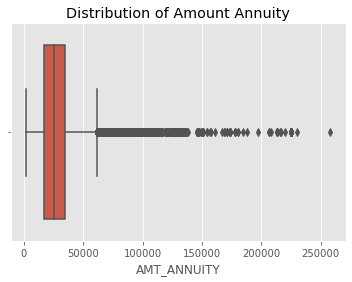

In [38]:
sns.boxplot(app_data.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

Some outliers are noticed in annuity amount.<br>
Most people belong to less annuity bucket.<br>
There is no much differece between the mean and median, We can impute the outliers with Median here.

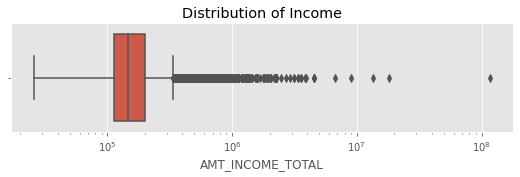

In [39]:
plt.figure(figsize=(9,2))
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

Some outliers are noticed in income amount.<br>
The third quartiles is very slim for income amount.<br>
it is beneficial to look into the quantiles instead of the box plot, mean or median. Quantile may give you a fair idea about the outliers<br>


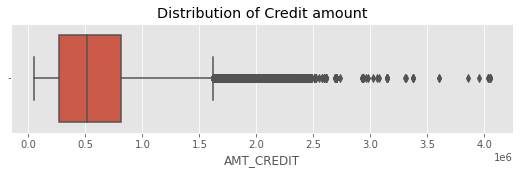

In [40]:
plt.figure(figsize=(9,2))
sns.boxplot(app_data.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

There is considerable amt. of variation in different quartiles of data,Amount credited also varies from person to person.

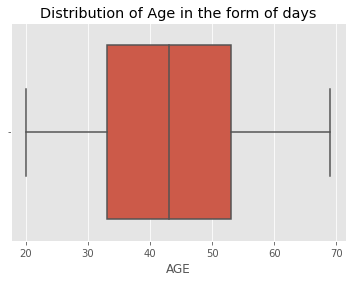

In [41]:
app_data['AGE'] = app_data['DAYS_BIRTH']//365.25
sns.boxplot(app_data.AGE)
plt.title('Distribution of Age in the form of days')
plt.show()
app_data=app_data.drop(['AGE'],axis=1)

There is no much difference between mean and median. Which means that all the applications received from the customers are from age 30-50

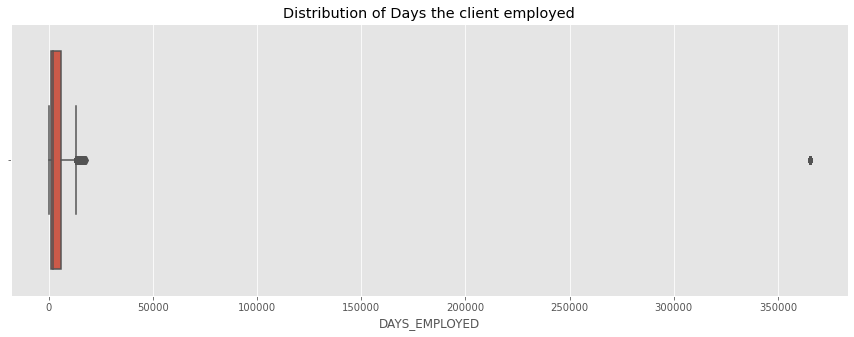

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(app_data.DAYS_EMPLOYED)
plt.title('Distribution of Days the client employed')
plt.show()

#### Observation: 
From the above 5 box plots we get an idea that there are outliers in the columns such as "AMT_ANNUITY", "AMT_TOTAL_INCOME", "AMT_CREDIT", "DAYS_EMPLOYED"<br>
As an add-on, we will plot the box plots after removing the values lying above 99 percentile for these 4 variables.<br>
Here, we are not modifying the original data frame. We are not performing any outlier treatment, but just showing the barplots by dropping all records haveing values more than 99 percentile for these 4 columns.

In [43]:
#Excluding values outside 99%ile in each of the 3 variables
app_data_1=app_data[app_data.AMT_ANNUITY<np.nanpercentile(app_data['AMT_ANNUITY'], 99)]
app_data_1=app_data[app_data.AMT_INCOME_TOTAL<np.nanpercentile(app_data['AMT_INCOME_TOTAL'], 99)]
app_data_1=app_data[app_data.AMT_INCOME_TOTAL<np.nanpercentile(app_data['AMT_CREDIT'], 99)]
app_data_1=app_data[app_data.DAYS_EMPLOYED<np.nanpercentile(app_data['DAYS_EMPLOYED'], 99)]

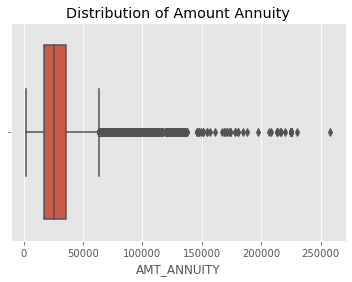

In [44]:
sns.boxplot(app_data_1.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

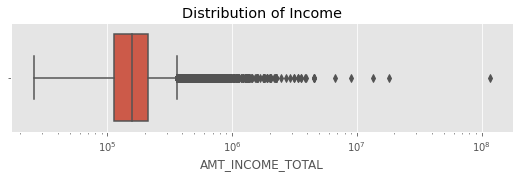

In [45]:
plt.figure(figsize=(9,2))
sns.boxplot(app_data_1.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

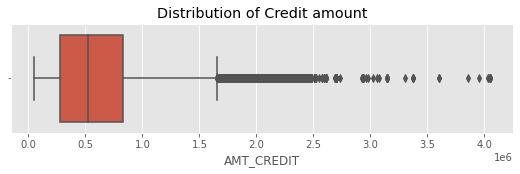

In [46]:
plt.figure(figsize=(9,2))
sns.boxplot(app_data_1.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

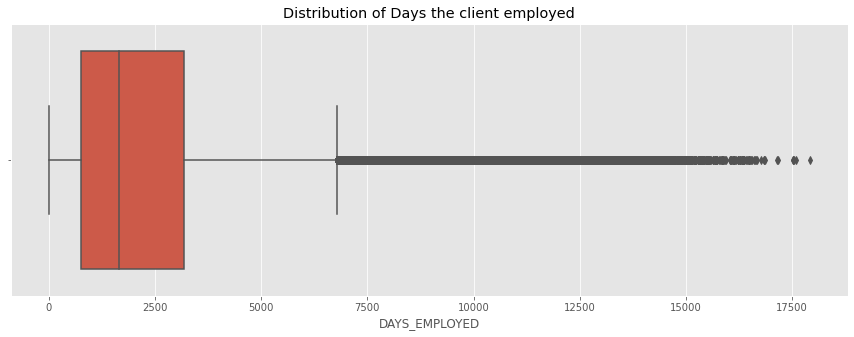

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(app_data_1.DAYS_EMPLOYED)
plt.title('Distribution of Days the client employed')
plt.show()

For the above mentioned col. majority distribution is smooth but there are certain outliers in the last 1%. The best is to remove the extreme values and cap rest.

#### Outlier treatment

In [48]:
app_data.loc[app_data.AMT_INCOME_TOTAL <= app_data.AMT_INCOME_TOTAL.quantile(0.98), 'AMT_INCOME_TOTAL']= app_data.AMT_INCOME_TOTAL
app_data.loc[app_data.AMT_INCOME_TOTAL > app_data.AMT_INCOME_TOTAL.quantile(0.98), 'AMT_INCOME_TOTAL']= app_data.AMT_INCOME_TOTAL.quantile(0.98)

Among all the applications received, let us see how many defaulters are there and then split the data frame for defaulters and non-defaulters

# Analysis

### Checking the Imbalance Ratio

In [49]:
100*(app_data.TARGET.value_counts())/ (len(app_data))

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

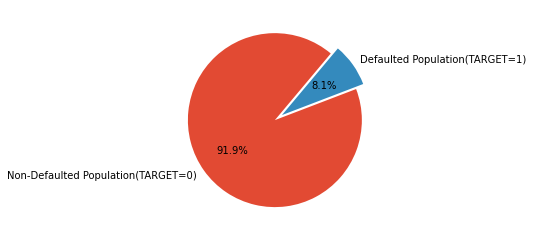

In [50]:
# Figuratively showing it on a pie chart
x = ['Non-Defaulted Population(TARGET=0)', 'Defaulted Population(TARGET=1)']
explode = [0.1, 0]
plt.pie(app_data.TARGET.value_counts(normalize=True)*100, explode=explode, labels=x, autopct='%1.1f%%', startangle=50)
plt.show()

8.1% clients have payment difficulties and 91.92% are having no difficulties.

#### Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [51]:
target_1 = app_data[app_data['TARGET']==1]
target_0 = app_data[app_data['TARGET']==0]

#### Finding the correlation among the data for defaulters

If one column has been derived from another column, then the two columns will end up having a veryhigh correlation.<br>
Since we have derived "AGE" from "DAYS_BIRTH", we will have to drop one of the columns before starting the correlation test.<br>
Dropping the column "DAYS_BIRTH"

In [52]:
#Finding correlation for numerical columns for the cases TARGET-1 
corr_1= target_1.corr() 
corr_1=corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
corr_df1=corr_1.unstack().reset_index()
corr_df1.columns=['Var1','Var2', 'Correlation']
corr_df1.dropna(subset=['Correlation'], inplace=True)
corr_df1['Correlation_Abs']= corr_df1['Correlation'].abs()
corr_df1.sort_values('Correlation_Abs', ascending=False, inplace=True)
Top10_corr1= corr_df1.head(10)
Top10_corr1.reset_index(drop = True)

Var1                      Var2  Correlation  \
0  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998269   
1           AMT_GOODS_PRICE                AMT_CREDIT     0.983103   
2  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.868994   
3           AMT_GOODS_PRICE               AMT_ANNUITY     0.752699   
4               AMT_ANNUITY                AMT_CREDIT     0.752195   
5             DAYS_EMPLOYED                DAYS_BIRTH     0.582185   
6               AMT_ANNUITY          AMT_INCOME_TOTAL     0.430682   
7           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.354769   
8                AMT_CREDIT          AMT_INCOME_TOTAL     0.353619   
9  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.337181   

   Correlation_Abs  
0         0.998269  
1         0.983103  
2         0.868994  
3         0.752699  
4         0.752195  
5         0.582185  
6         0.430682  
7         0.354769  
8         0.353619  
9         0.337181

In [53]:
#Finding correlation for numerical columns for the cases TARGET-0
corr_0= target_0.corr() 
corr_0=corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool))
corr_df0=corr_0.unstack().reset_index()
corr_df0.columns=['Var1','Var2', 'Correlation']
corr_df0.dropna(subset=['Correlation'], inplace=True)
corr_df0['Correlation_Abs']= corr_df0['Correlation'].abs()
corr_df0.sort_values('Correlation_Abs', ascending=False, inplace=True)
Top10_corr0=corr_df0.head(10)
Top10_corr0.reset_index(drop = True)

Var1                      Var2  Correlation  \
0  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
1           AMT_GOODS_PRICE                AMT_CREDIT     0.987253   
2  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859289   
3           AMT_GOODS_PRICE               AMT_ANNUITY     0.776686   
4               AMT_ANNUITY                AMT_CREDIT     0.771308   
5             DAYS_EMPLOYED                DAYS_BIRTH     0.626116   
6               AMT_ANNUITY          AMT_INCOME_TOTAL     0.488599   
7           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.419921   
8                AMT_CREDIT          AMT_INCOME_TOTAL     0.414447   
9                DAYS_BIRTH              CNT_CHILDREN    -0.336966   

   Correlation_Abs  
0         0.998508  
1         0.987253  
2         0.859289  
3         0.776686  
4         0.771308  
5         0.626116  
6         0.488599  
7         0.419921  
8         0.414447  
9         0.336966

<blockquote>For Default and Non-default population, the highest correlation is almost same in both Target_0 and Target_1 dataframe and between same variables.</blockquote>

## Univariate Analysis

#### Categorical Univariate Analysis

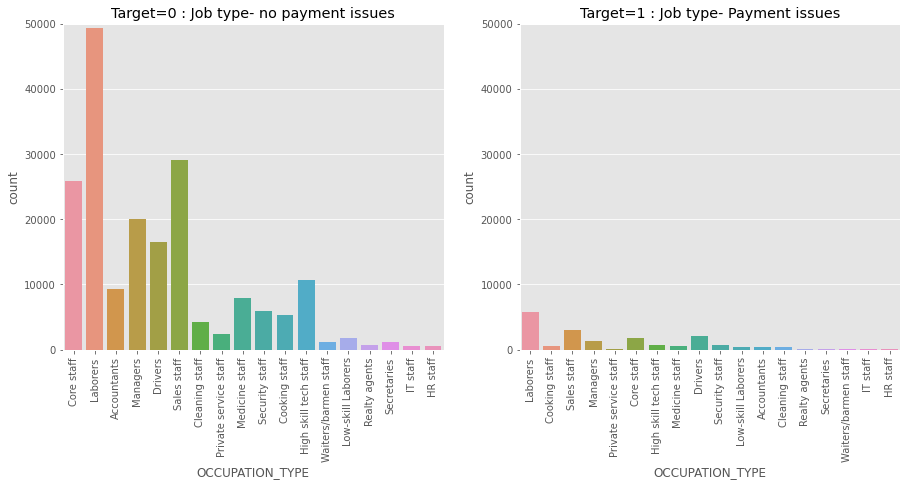

In [54]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

The plot clearly shows that labourers are most likely to make payment on time whereas HR staff are less likely to make payment on time

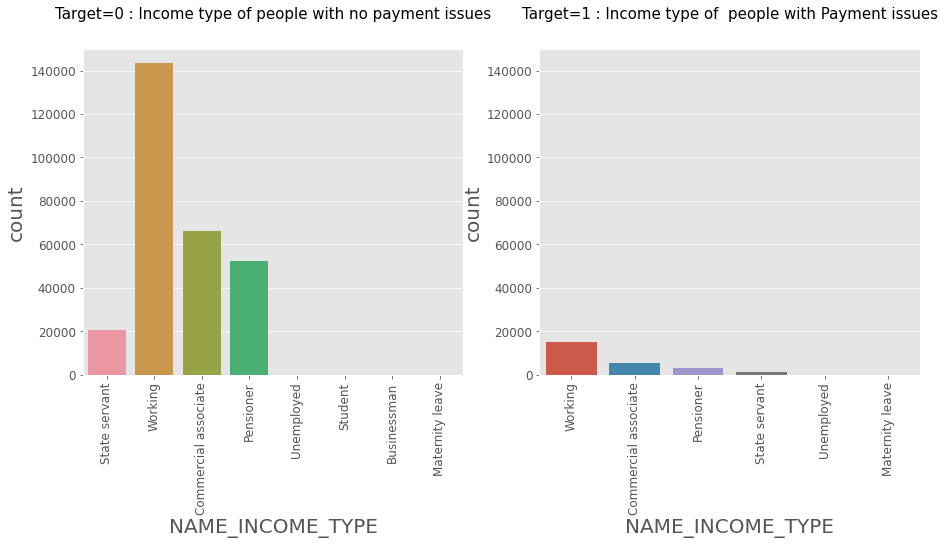

In [55]:
# Categorical variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()

Working professionals have applied for maximum loans

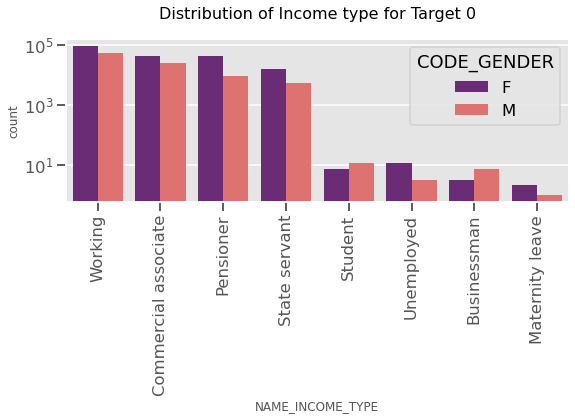

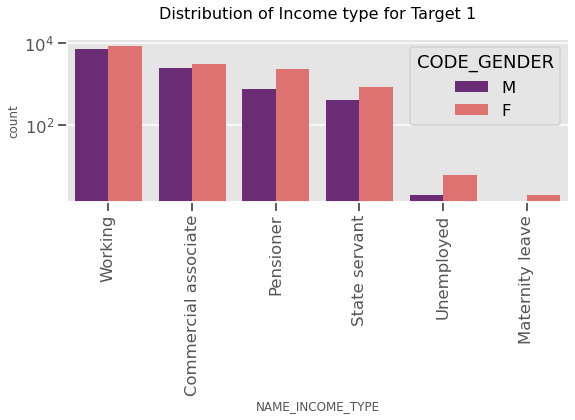

In [56]:
def uniplot(df,col,title,hue =None):
#     sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titlepad'] = 20
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(9 , 3)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 

uniplot(target_0,col='NAME_INCOME_TYPE',title='Distribution of Income type for Target 0',hue='CODE_GENDER')
uniplot(target_1,col='NAME_INCOME_TYPE',title='Distribution of Income type for Target 1',hue='CODE_GENDER')

For Target 0:-<br>

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.<br>
For this Females are having more number of credits than male.<br>
Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.<br>

For Target 1:-<br>

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.<br>
For this Females are having more number of credits than male.<br>
Less number of credits for income type ‘Maternity leave’.<br>

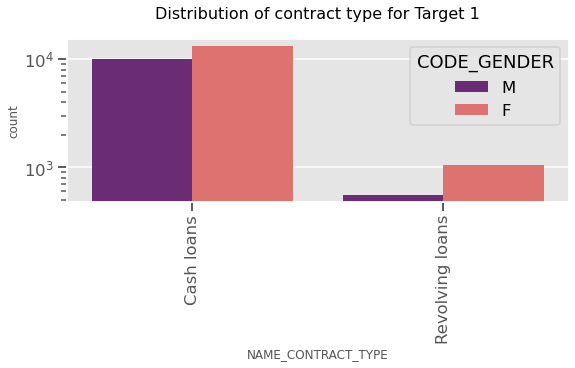

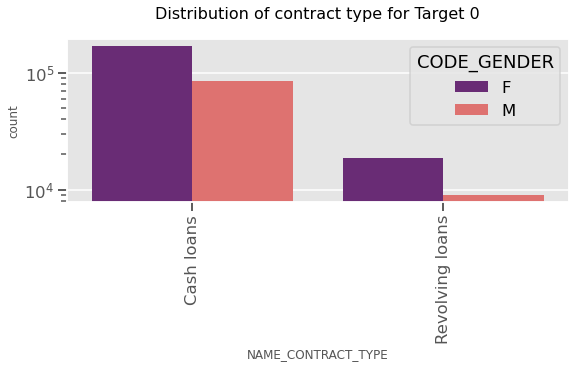

In [57]:
uniplot(target_1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type for Target 1',hue='CODE_GENDER')
uniplot(target_0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type for Target 0',hue='CODE_GENDER')

For Target 1:-<br>

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.<br>
Female is leading for applying credits.<br>

For Target 0:-<br>

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.<br>

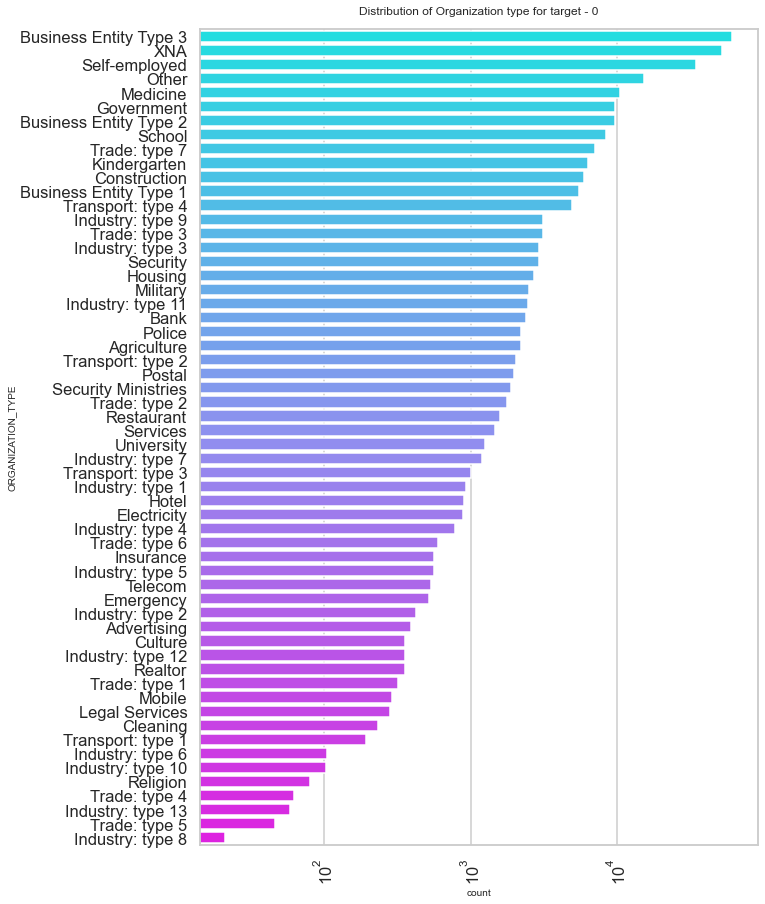

In [58]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,15))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titlepad'] = 15

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

__Inference:__<br>
Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.<br>
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

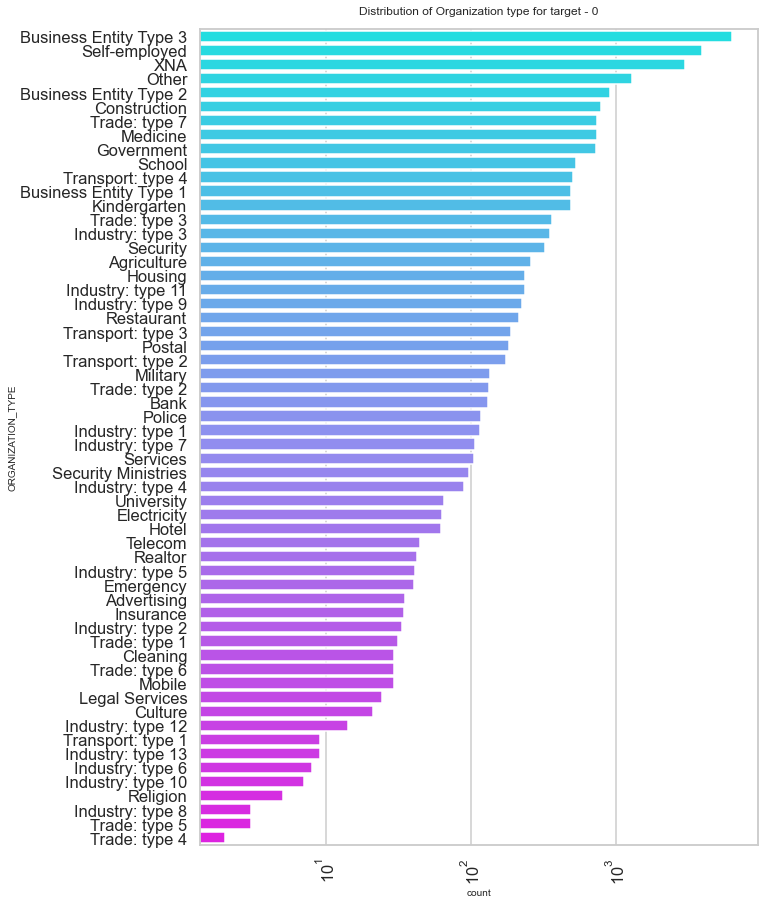

In [59]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,15))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titlepad'] = 15

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target_1,y='ORGANIZATION_TYPE',order=target_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

__Inference:__<br>
Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.<br>
Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
Same as type 0 in distribution of organization type.

### Numeric Univariate Analysis

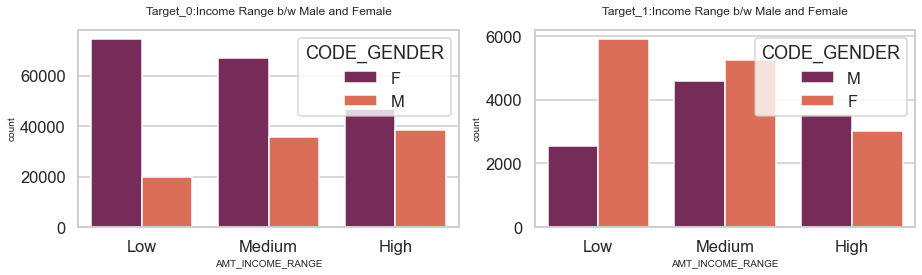

In [61]:
# Numeric variable analysis for target_0 & target_1 dataframe
# PLotting for income range
slot = ['Low','Medium','High']
target_0['AMT_INCOME_RANGE']=pd.qcut(target_0['AMT_INCOME_TOTAL'],q=[0.0,0.33,0.66,1],labels=slot)

slot = ['Low','Medium','High']
target_1['AMT_INCOME_RANGE']=pd.qcut(target_1['AMT_INCOME_TOTAL'],q=[0.0,0.33,0.66,1],labels=slot)
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='rocket')
plt.show()

For Target 1:-<br>

less count for High income range.<br>
This graph show that males are more than female in having credits for High range.<br>

For Target 0:-<br>

Female counts are higher than male.<br>
less count for High income range.<br>

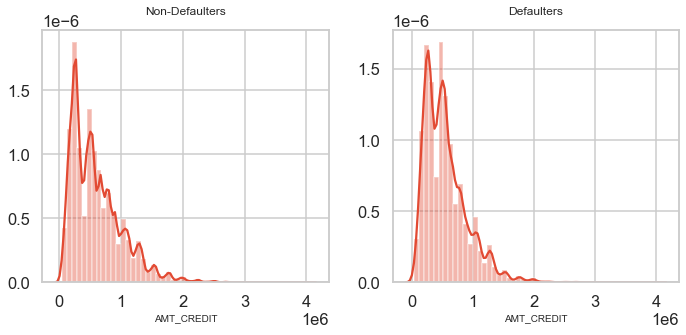

In [62]:
#AMT_CREDIT
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(target_0['AMT_CREDIT'])
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
sns.distplot(target_1['AMT_CREDIT'])
plt.title('Defaulters')
plt.tight_layout()
plt.show()

The above graph can also be plotted overlapping to get a better understanding.

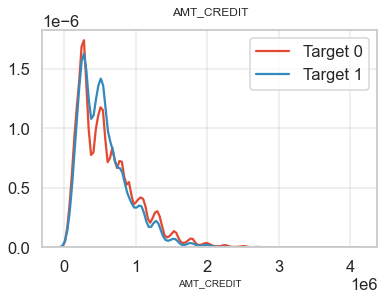

In [63]:
#Analyse continuous column with respect to the target column
sns.distplot(target_0['AMT_CREDIT'], hist = False, label="Target 0")# Target = 0
sns.distplot(target_1['AMT_CREDIT'], hist = False, label='Target 1')# Taget = 1
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

__Inference:__ Credit amount is left skewed

#### Binning a few continuous variables

In [64]:
slot = ['Low','Medium','High']
target_0['AMT_ANNUITY_RANGE']=pd.qcut(target_0['AMT_ANNUITY'],q=[0.0,0.33,0.66,1],labels=slot)

In [65]:
slot = ['Low','Medium','High']
target_1['AMT_ANNUITY_RANGE']=pd.qcut(target_1['AMT_ANNUITY'],q=[0.0,0.33,0.66,1],labels=slot)

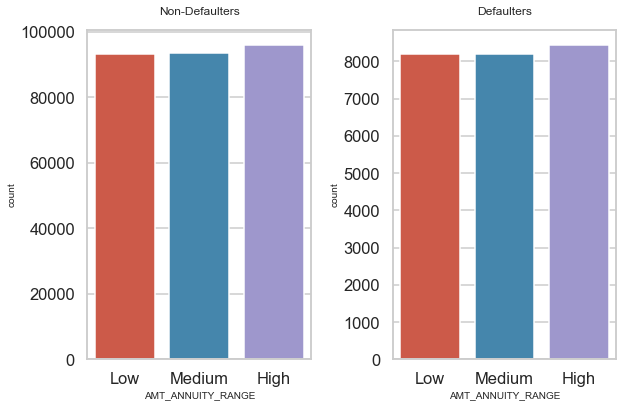

In [66]:
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
g = sns.countplot(data=target_0,x='AMT_ANNUITY_RANGE', orient='h')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
g = sns.countplot(data=target_1,x='AMT_ANNUITY_RANGE', orient='h')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

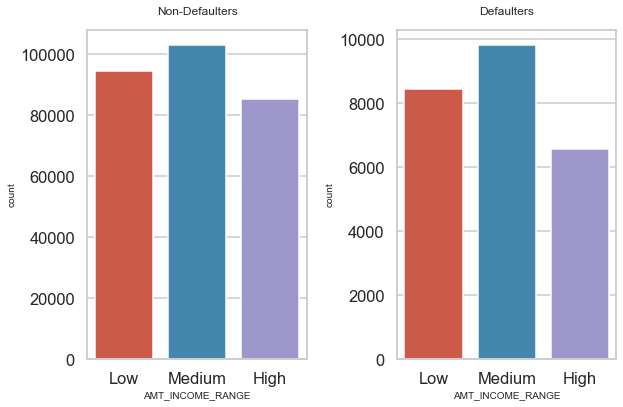

In [67]:
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
g = sns.countplot(data=target_0,x='AMT_INCOME_RANGE', orient='h')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
g = sns.countplot(data=target_1,x='AMT_INCOME_RANGE', orient='h')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

In [68]:
slots = ['Low','Medium','High']
target_0['AMT_CREDIT_RANGE']=pd.qcut(target_0['AMT_CREDIT'],q=[0,0.33,0.66,1],labels=slots)

In [69]:
slots = ['Low','Medium','High']
target_1['AMT_CREDIT_RANGE']=pd.qcut(target_1['AMT_CREDIT'],q=[0,0.33,0.66,1],labels=slots)

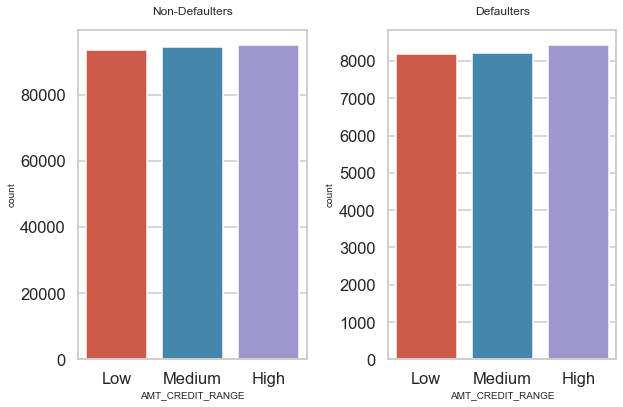

In [70]:
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
g = sns.countplot(data=target_0,x='AMT_CREDIT_RANGE', orient='h')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
g = sns.countplot(data=target_1,x='AMT_CREDIT_RANGE', orient='h')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

In [71]:
#Binning on Age variable 
target_0['AGE'] = target_0['DAYS_BIRTH']//365.25
target_1['AGE'] = target_1['DAYS_BIRTH']//365.25

target_0['AGE_GROUP']= pd.cut(target_0.AGE,bins=np.linspace(20 ,70,num=11))
target_1['AGE_GROUP']= pd.cut(target_1.AGE,bins=np.linspace(20 ,70,num=11))

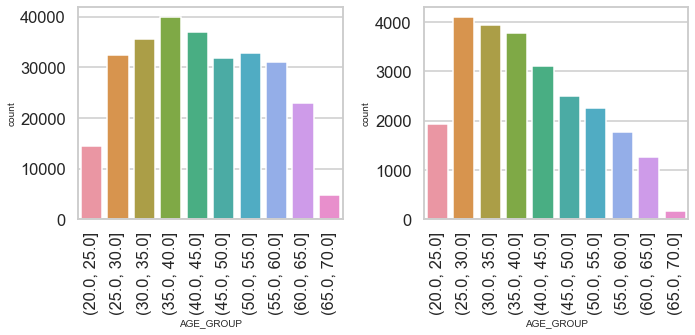

In [72]:
#AGE_GROUP
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
g = sns.countplot(data=target_0,x='AGE_GROUP', orient='h')
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
g = sns.countplot(data=target_1,x='AGE_GROUP', orient='h')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

Inference: People in the age group of 25 to 45 apply highest for the loans

In [74]:
# Binning on Income
app_data.loc[:,'INCOME_RANGE']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.80,1],
labels=['Low','Medium','High','Very_High'])

target_0.loc[:,'INCOME_RANGE']=pd.qcut(target_0.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.80,1],
labels=['Low','Medium','High','Very_High'])

target_1.loc[:,'INCOME_RANGE']=pd.qcut(target_1.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.80,1],
labels=['Low','Medium','High','Very_High'])

## BiVariate Analysis

As we can see that both "defauters" and "non-defaulters" have a very good correlation between "AMT_GOODS_PRICE" and "AMT_CREDIT", hence plotting the same to see the trend

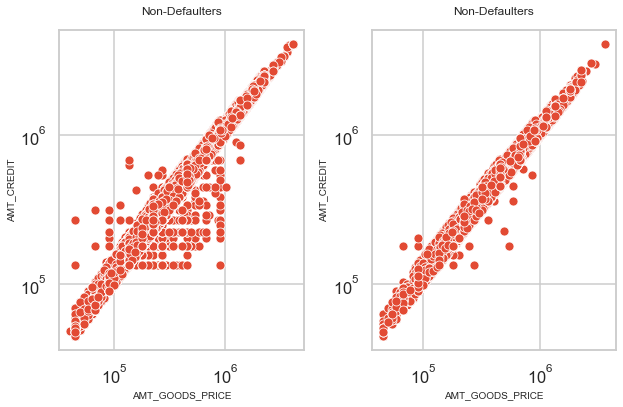

In [75]:
# Numerical vs Numerical Category
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
g = sns.scatterplot(data=target_0,x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.title('Non-Defaulters')
plt.xscale('log')
plt.yscale('log')


plt.subplot(1,2,2)
g = sns.scatterplot(data=target_1,x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.title('Defaulters')
plt.tight_layout()
plt.title('Non-Defaulters')
plt.xscale('log')
plt.yscale('log')
plt.show()

As we can see that both "defauters" and "non-defaulters" have a very good correlation between "OBS_30_CNT_SOCIAL_CIRCLE" and "OBS_60_CNT_SOCIAL_CIRCLE", hence plotting the same to see the trend<br>
People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan

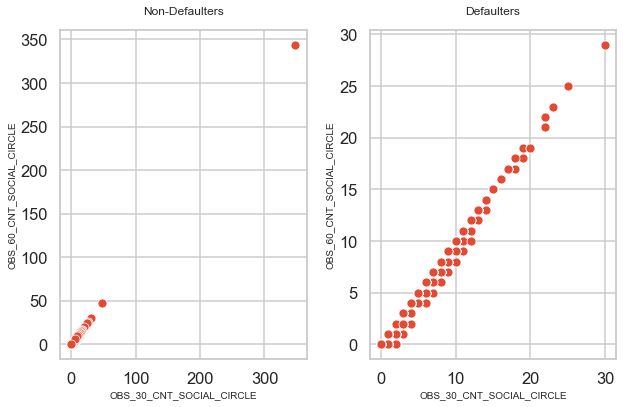

In [76]:
# Numerical vs Numerical Category
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
g = sns.scatterplot(data=target_0,x='OBS_30_CNT_SOCIAL_CIRCLE', y='OBS_60_CNT_SOCIAL_CIRCLE')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
g = sns.scatterplot(data=target_1,x='OBS_30_CNT_SOCIAL_CIRCLE', y='OBS_60_CNT_SOCIAL_CIRCLE')
plt.title('Defaulters')
plt.tight_layout()
plt.show()

As we can see that both "defauters" and "non-defaulters" have a very good correlation between "AMT_GOODS_PRICE" and "AMT_ANNUITY", hence plotting the same to see the trend

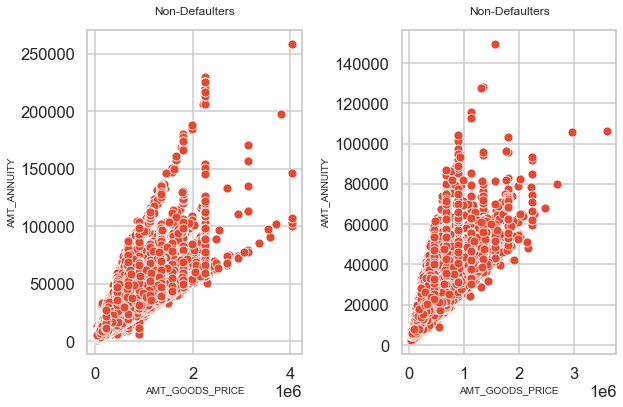

In [77]:
# Numerical vs Numerical Category
plt.figure(figsize = (9,6))
plt.subplot(1,2,1)
g = sns.scatterplot(data=target_0,x='AMT_GOODS_PRICE', y='AMT_ANNUITY')
plt.title('Non-Defaulters')

plt.subplot(1,2,2)
g = sns.scatterplot(data=target_1,x='AMT_GOODS_PRICE', y='AMT_ANNUITY')
plt.title('Defaulters')
plt.tight_layout()
plt.title('Non-Defaulters')
plt.show()

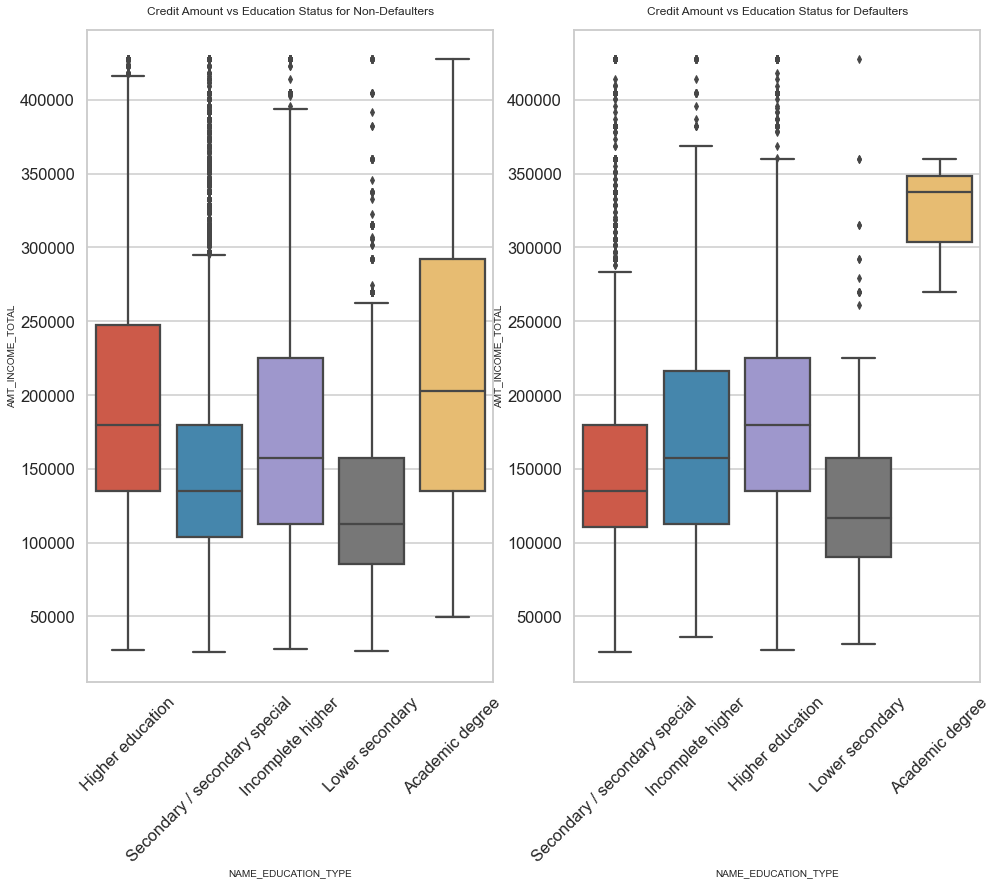

In [78]:
#Numerical Vs Categorical Category
# "NAME_EDUCATION_TYPE" vs. "AMT_INCOME_TOTAL"
plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', orient='v')
plt.title('Credit Amount vs Education Status for Non-Defaulters')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', orient='v')
plt.title('Credit Amount vs Education Status for Defaulters')
plt.show()

From the defaulters plot, 'Academic-degree' category has the highest default rate.<br>
Applicant from Academic degree have higher total Income.

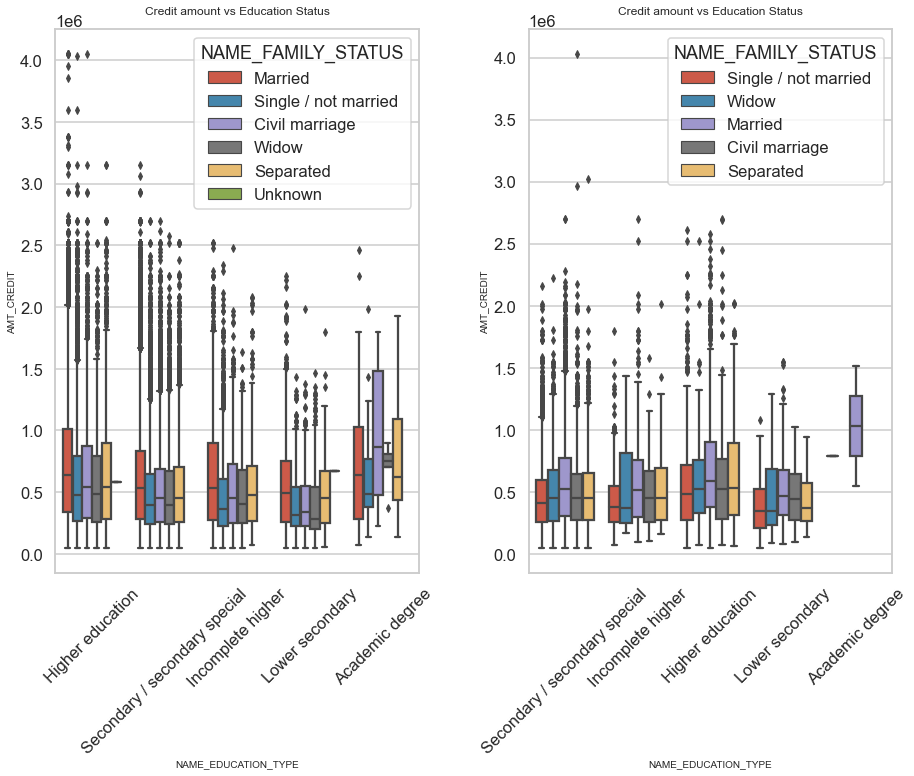

In [79]:
#Numerical Vs Categorical Category
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

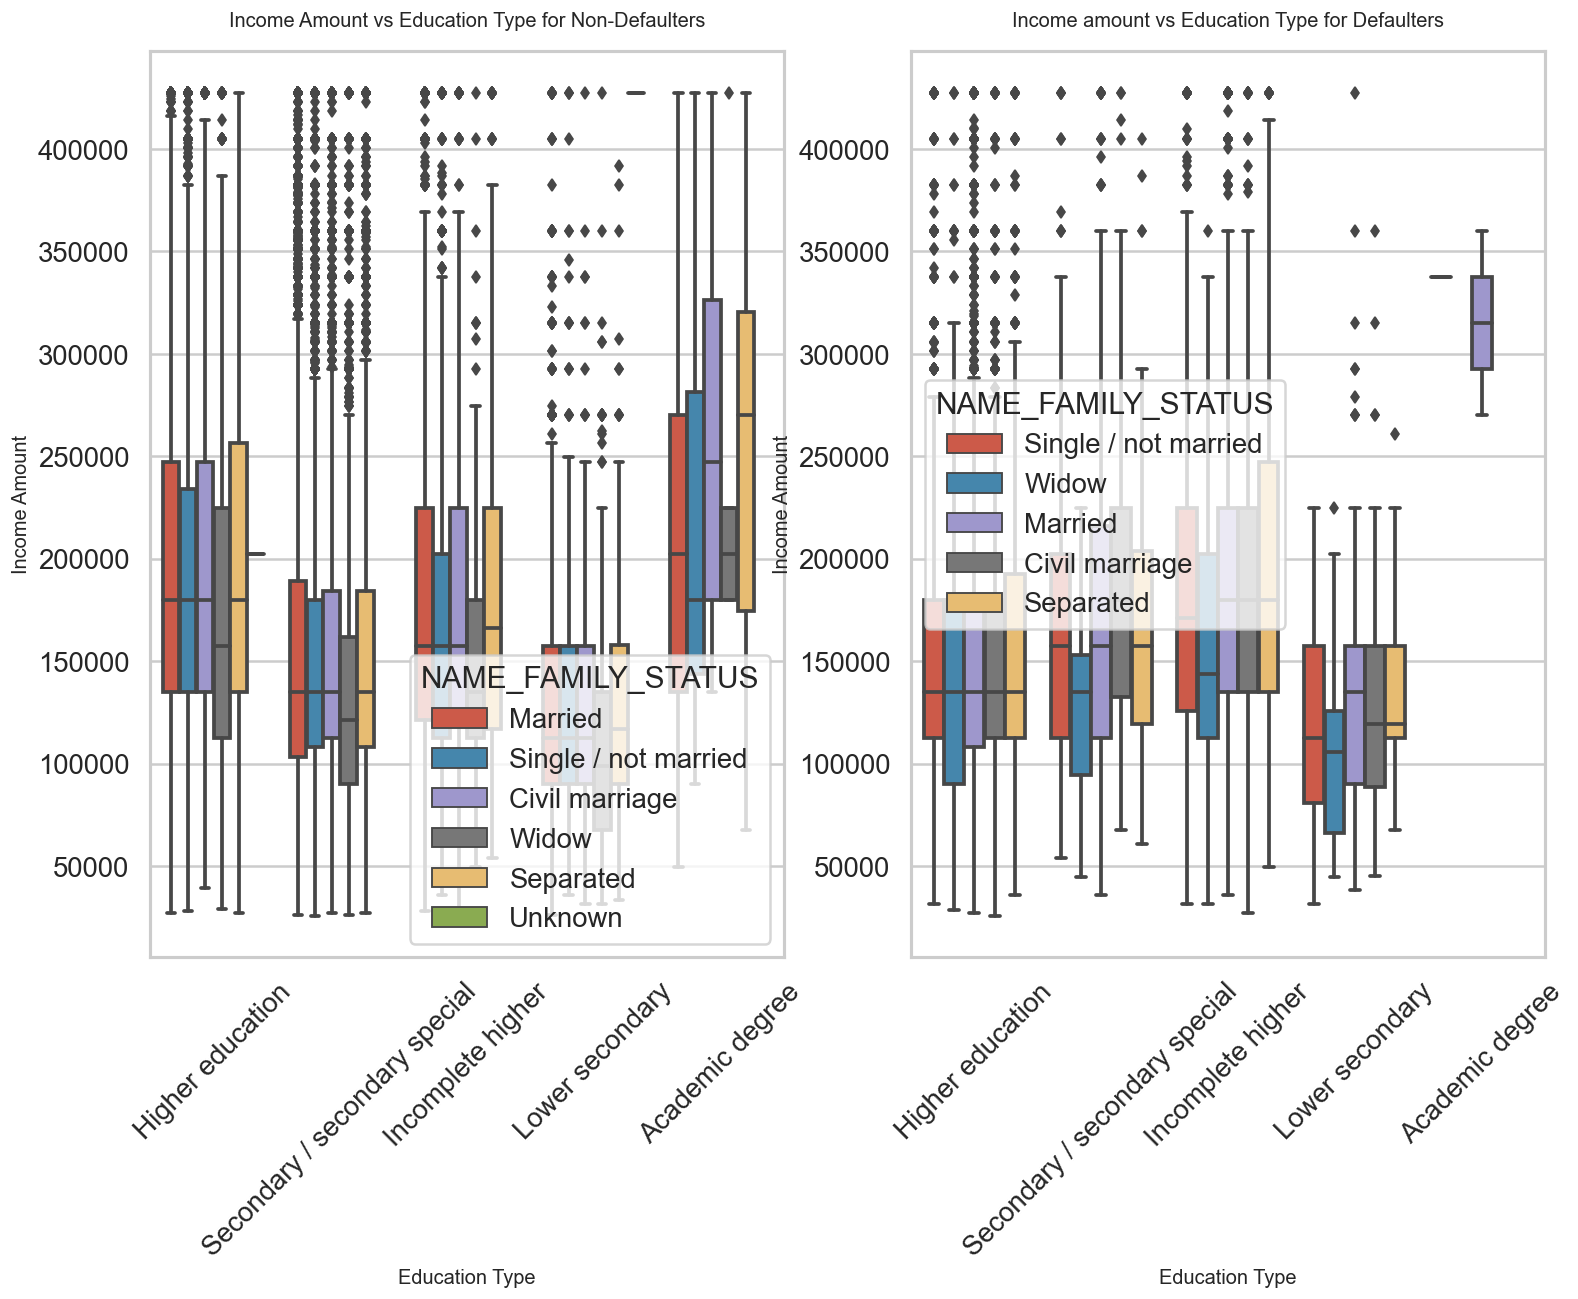

In [80]:
#Numerical Vs Categorical Category
# "Family Status" -- "Income Amount" -- "Education Type"
plt.figure(figsize=(15,10), edgecolor='c', dpi=120, frameon=True)
plt.subplot(121)
g1 = sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS', orient='v')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Education Type", fontsize=12)
g1.set_ylabel("Income Amount", fontsize=12)
g1.set_title('Income Amount vs Education Type for Non-Defaulters')

plt.subplot(122)
g2 = sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS', orient='v')
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2.set_xlabel("Education Type", fontsize=12)
g2.set_ylabel("Income Amount", fontsize=12)
g2.set_title('Income amount vs Education Type for Defaulters')
plt.show()

Inference: From the defaulters plot, 'Academic-degree' category has the highest default rate and having family status as 'Married'.

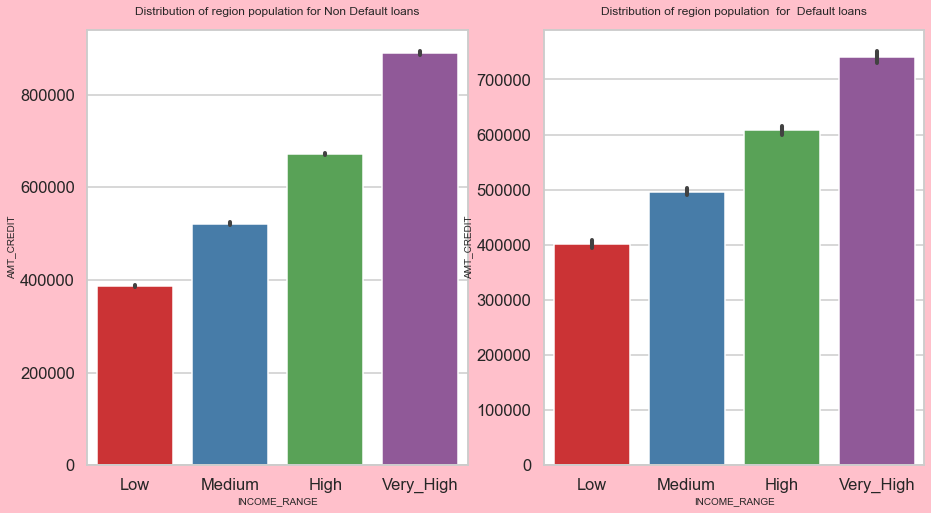

In [81]:
#Numerical Vs Categorical Category
# "INCOME_RANGE" vs. "AMT_CREDIT"
fig = plt.figure(figsize=(15,8))

plt.subplot(121)
sns.barplot(y=target_0["AMT_CREDIT"]
               ,x=target_0["INCOME_RANGE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans")
plt.subplot(122)
sns.barplot(y = target_1["AMT_CREDIT"]
               ,x=target_1["INCOME_RANGE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("pink")

Inference: People with Higher income range , seems to have availed higher Credit Amount.

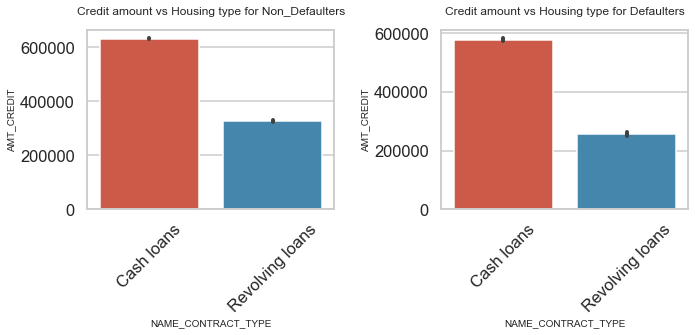

In [82]:
#Numerical Vs Categorical Category
# "NAME_CONTRACT_TYPE" vs. "AMT_CREDIT"
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.barplot(data =target_0, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT')
plt.title('Credit amount vs Housing type for Non_Defaulters')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.barplot(data =target_1, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT')
plt.title('Credit amount vs Housing type for Defaulters')

plt.tight_layout()
plt.show()

Inference: People with high credit amounts tend to have applied for more cash loans than revolving loans.

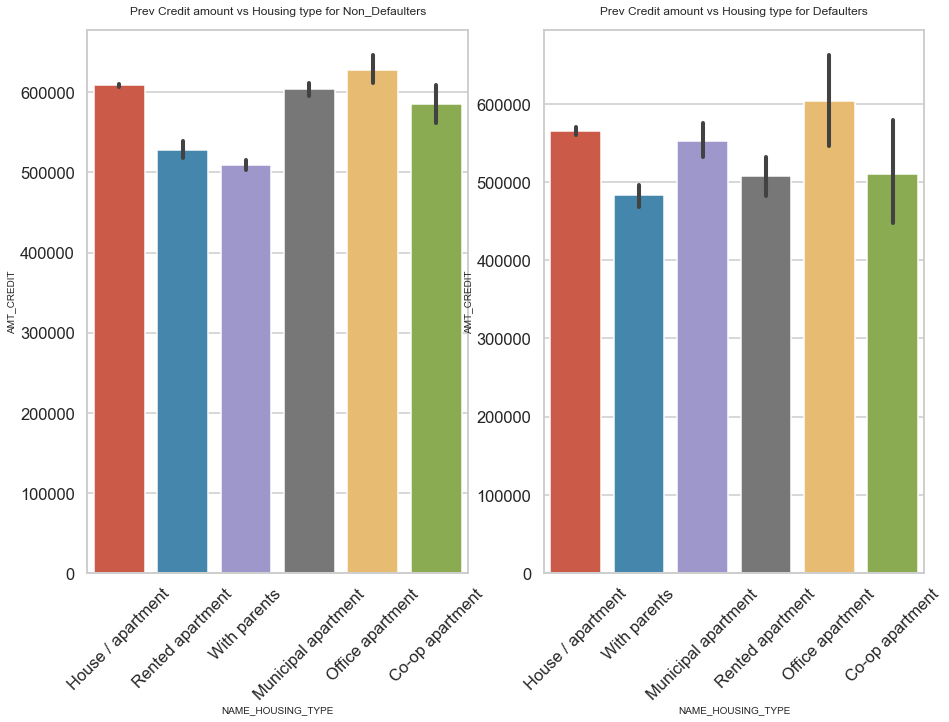

In [83]:
# "NAME_HOUSING_TYPE" vs. "AMT_CREDIT"
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.barplot(data =target_0, x='NAME_HOUSING_TYPE', y='AMT_CREDIT')
plt.title('Prev Credit amount vs Housing type for Non_Defaulters')

plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.barplot(data =target_1, x='NAME_HOUSING_TYPE', y='AMT_CREDIT')
plt.title('Prev Credit amount vs Housing type for Defaulters')
plt.show()


Higher credit amount was taken for 'office Apartment' type of Building.

## Reading the previous_application data set

In [84]:
prev_data = pd.read_csv(r"D:\Courses\Upgrad\Assignment & Case-Studies\Credit EDA Case Study\previous_application.csv")

In [85]:
prev_data.shape

(1670214, 37)

In [86]:
prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [87]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [88]:
# Finding out the null percentage in each column
null_percentage = (prev_data.isnull().sum()/len(prev_data))*100
null_percentage

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## Data Cleaning

In [89]:
# Dropping missing values greater than 40% in this data
prev_data = prev_data.drop(null_percentage[null_percentage>40].index,1)
prev_data.shape

#Dropping the unnecessary rows
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

prev_data.shape

(69635, 26)

#### Merging the two data sets

In [90]:
# Let us perform a left merge, keeping the app_data as the main dataset
merged_data = pd.merge(app_data, prev_data, how='inner', on=['SK_ID_CURR'])

In [91]:
merged_data.shape

(59412, 68)

In [92]:
# Renaming the column names after merging

merged_data = merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
merged_data.head()              
                           

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0           90000.0      180000.0   
1               Y             0          292500.0      665892.0   
2               N             1          360000.0      733315.5   
3               Y             0          180000.0      540000.0   
4               Y             0          180000.0      540000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         9000.0           180000.0   Unaccompanied               Working   
1        24592.5           477000.0   Unaccompanied  Commercial associate   
2        39069.0           679500.0   Unaccompanied  Commercial associate   
3        27000.0           540000.0   Unaccompanied               Working   
4        27000.0           540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755       10341           1010             4799.0   
1                    0.025164       15280           2668             5266.0   
2                    0.015221       11694           2060             3557.0   
3                    0.025164       16126           1761             8236.0   
4                    0.025164       16126           1761             8236.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START_x  \
0             3015        Laborers                      TUESDAY   
1             3787             NaN                    WEDNESDAY   
2             3557         Drivers                     THURSDAY   
3             4292        Managers                      TUESDAY   
4             4292        Managers                      TUESDAY   

   HOUR_APPR_PROCESS_START_x REG_REGION_NOT_LIVE_REGION  \
0                         16                          0   
1                         13                          0   
2                         10                          0   
3                          8                          0   
4                          8                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      1                      1                       0   
3                      0                      0                       0   
4                      0                      0                       0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.502779                       0.0   
1  Business Entity Type 3      0.479987                       0.

In [93]:
# Removing unwanted columns for analysis

merged_data.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
              'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [94]:
merged_data.shape

(59412, 59)

## Univariate

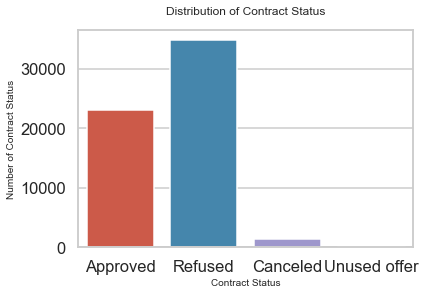

In [95]:
# Creating a plot of variable 'NAME_CONTRACT_TYPE' which tells us the status of all the contracts
sns.countplot(merged_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Number of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

Most of the Applicants between previous and current applicants have been Refused Credit previously.

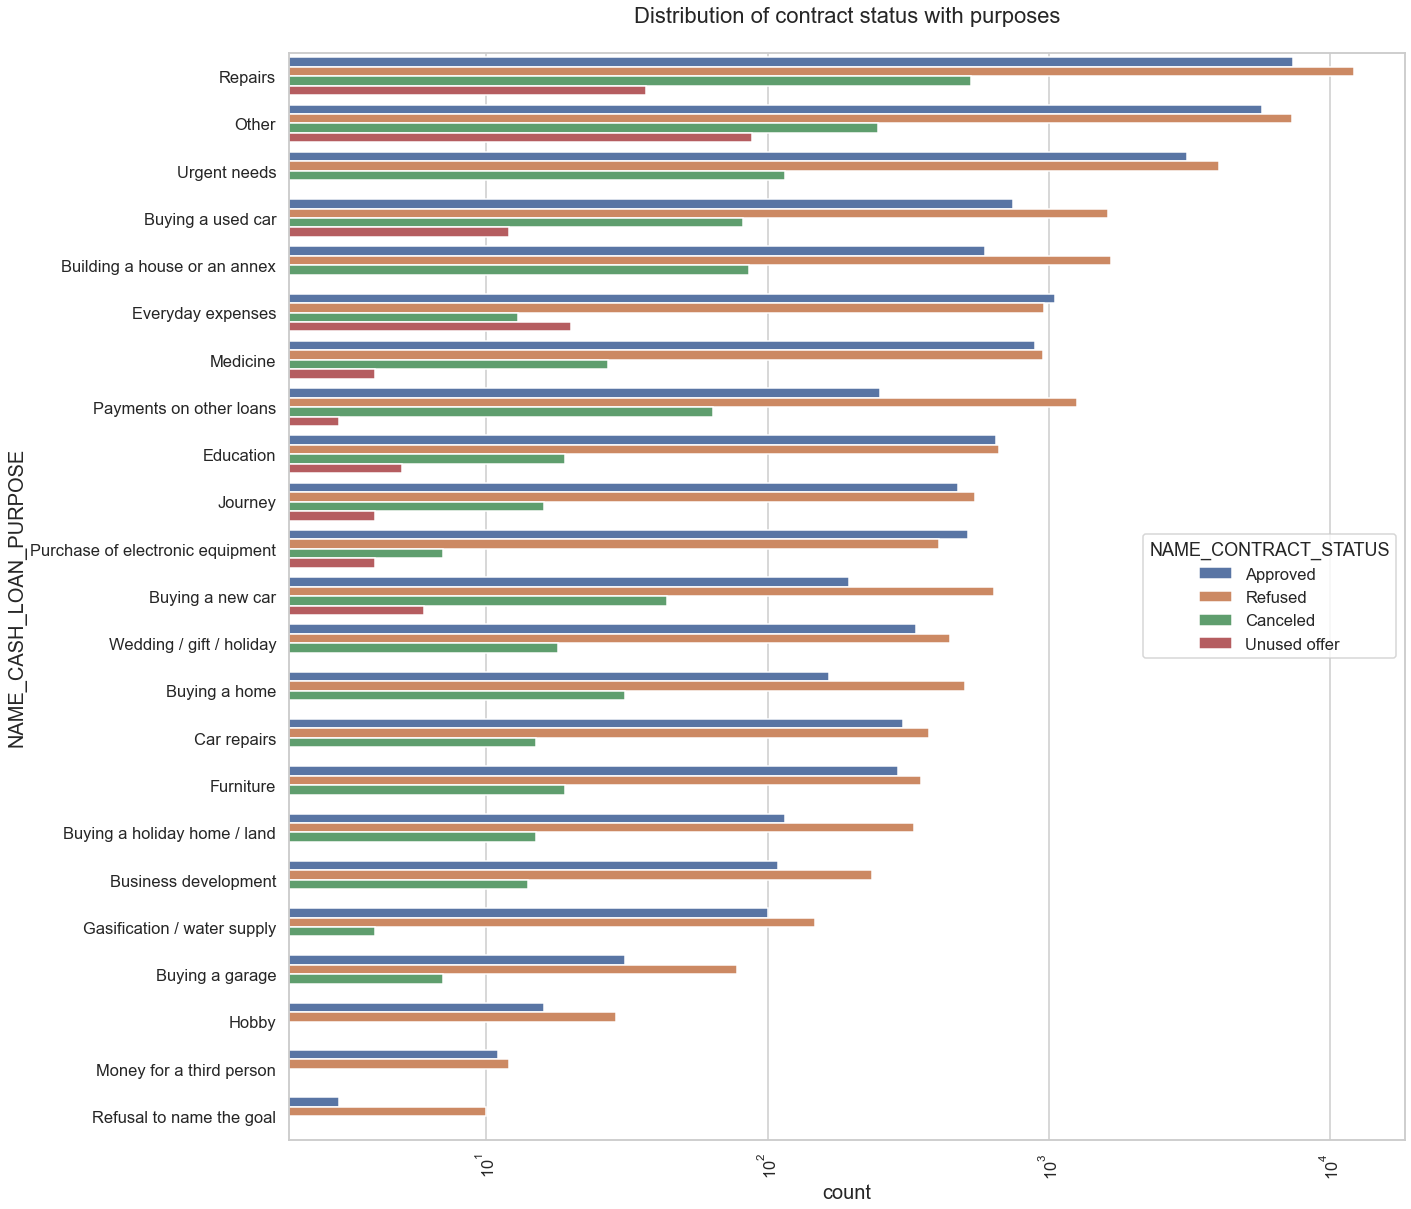

In [96]:
# Univariate
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = merged_data, y='NAME_CASH_LOAN_PURPOSE', 
                 order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                 hue = 'NAME_CONTRACT_STATUS',palette='deep')

Most rejection of loans came from purpose 'Repairs'. For education purposes we have equal number of approves and rejection PayinG other loans and buying a new car is having significant higher rejection than approves

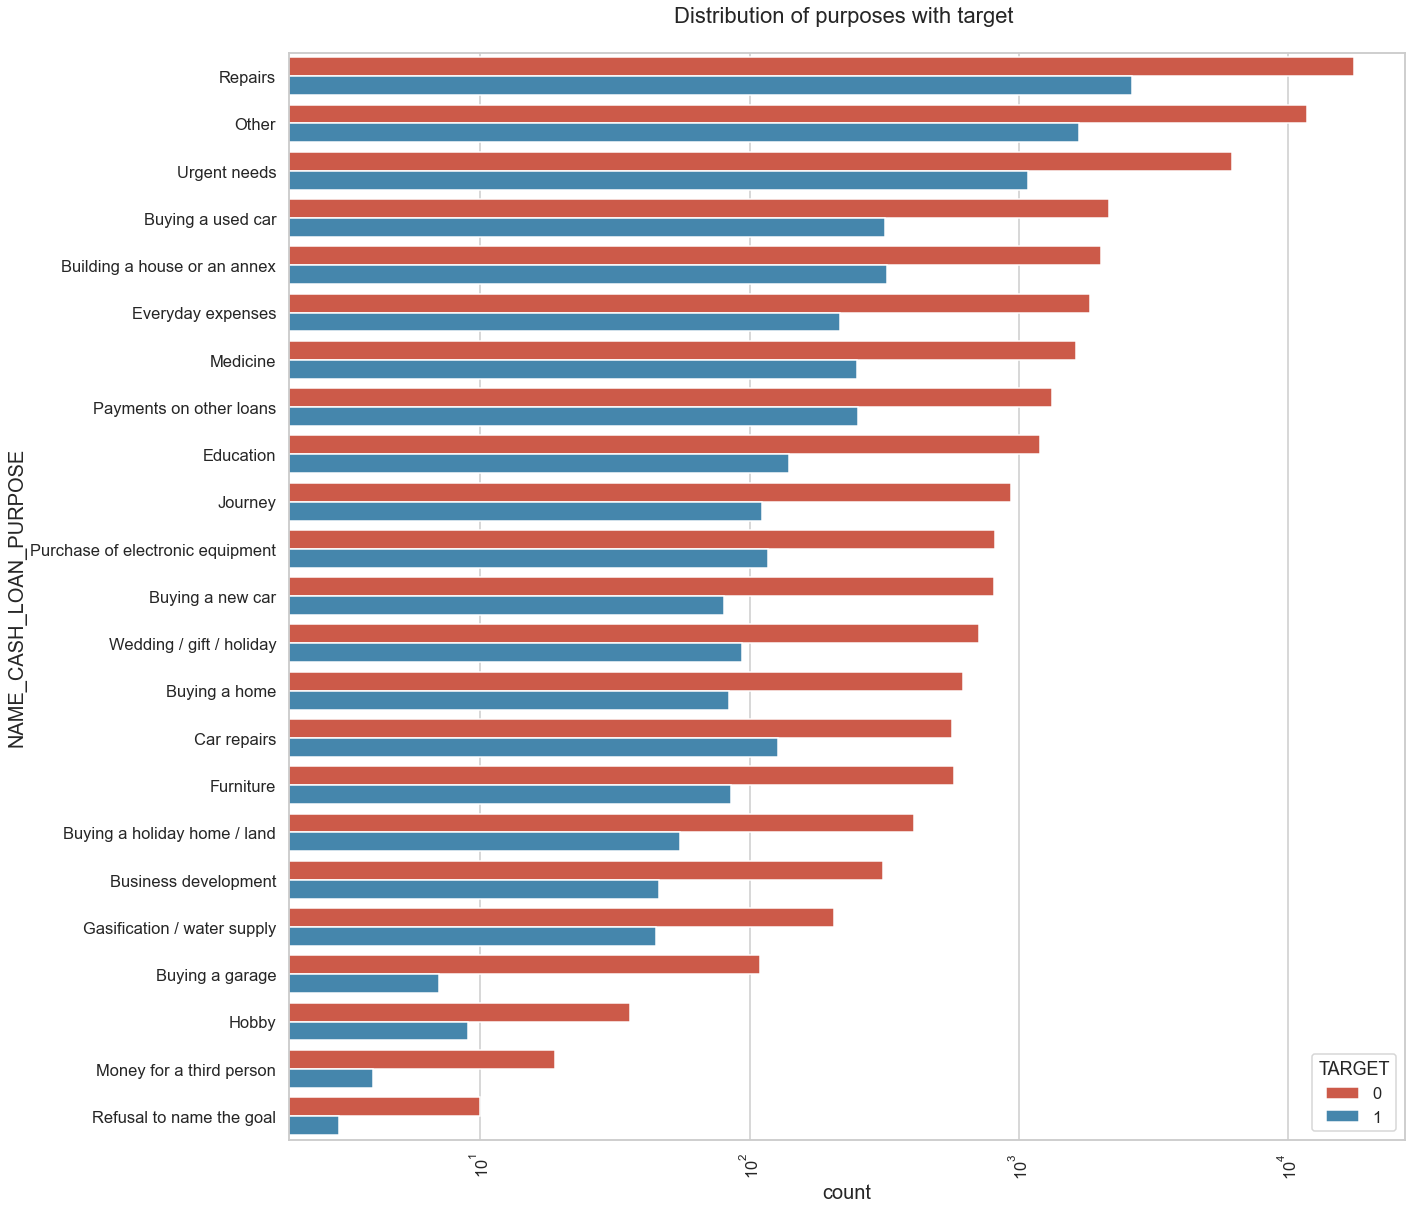

In [97]:
# Univariate
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

Loan purposes with 'Repairs' are facing more difficulites in payment on time.<br> 
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'.Therefore, Bank can focus on these categories as they have minimal risks.

## BiVariate

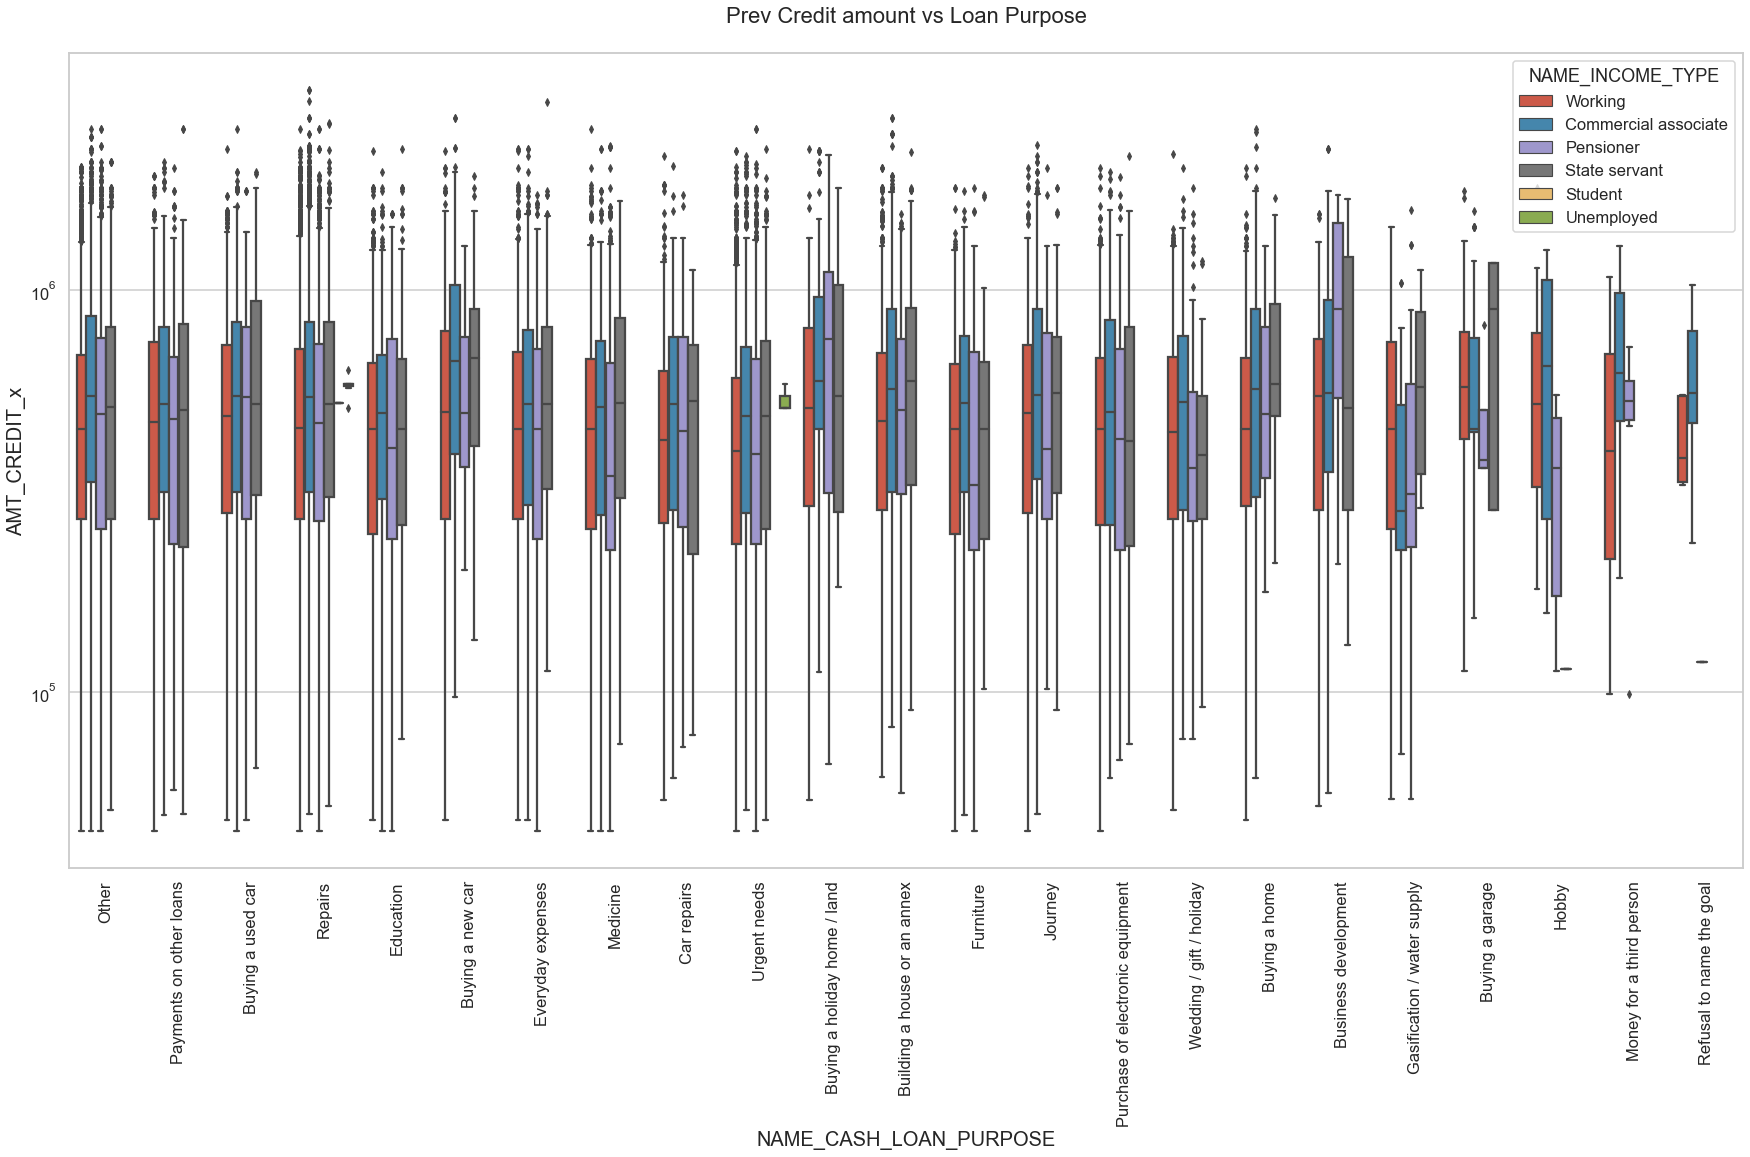

In [98]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =merged_data, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_x',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Inference- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for

### Some Other Analysis

__Creating 4 different dataframes from the mereged dataframe based on "CONTRACT_STATUS".__<br>

In [99]:
approved=merged_data[merged_data.NAME_CONTRACT_STATUS=='Approved']
refused=merged_data[merged_data.NAME_CONTRACT_STATUS=='Refused']
cancelled=merged_data[merged_data.NAME_CONTRACT_STATUS=='Canceled']
unused=merged_data[merged_data.NAME_CONTRACT_STATUS=='Unused Offer']

In [100]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['Non-Defaulted Population(TARGET=0)', 'Defaulted Population(TARGET=1)']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=(approved.TARGET.value_counts(normalize=True)*100), name="Approved"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=(refused.TARGET.value_counts(normalize=True)*100), name="Refused"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=(cancelled.TARGET.value_counts(normalize=True)*100), name="Cancelled"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Percentage of loans defaulted across the different contract status types",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Approved', x=0.1, y=0.5, font_size=10, showarrow=False),
                 dict(text='Refused', x=0.5, y=0.5, font_size=10, showarrow=False),
                 dict(text='Cancelled', x=0.9, y=0.5, font_size=10, showarrow=False)])
fig.show()

__Note:__ Unused offers cannot be defaulted.<br>
__Inference:__ Loans which have been refused and cancelled before have more chances to default as compared to the approved ones.

In [101]:
merged_data.groupby('NAME_HOUSING_TYPE')['NAME_CONTRACT_STATUS'].value_counts()/merged_data.groupby('NAME_HOUSING_TYPE')['NAME_CONTRACT_STATUS'].count()

NAME_HOUSING_TYPE    NAME_CONTRACT_STATUS
Co-op apartment      Refused                 0.533333
                     Approved                0.419048
                     Canceled                0.038095
                     Unused offer            0.009524
House / apartment    Refused                 0.587384
                     Approved                0.386772
                     Canceled                0.022784
                     Unused offer            0.003059
Municipal apartment  Refused                 0.536082
                     Approved                0.432499
                     Canceled                0.029455
                     Unused offer            0.001964
Office apartment     Refused                 0.629191
                     Approved                0.349112
                     Canceled                0.017751
                     Unused offer            0.003945
Rented apartment     Refused                 0.577720
                     Approved           

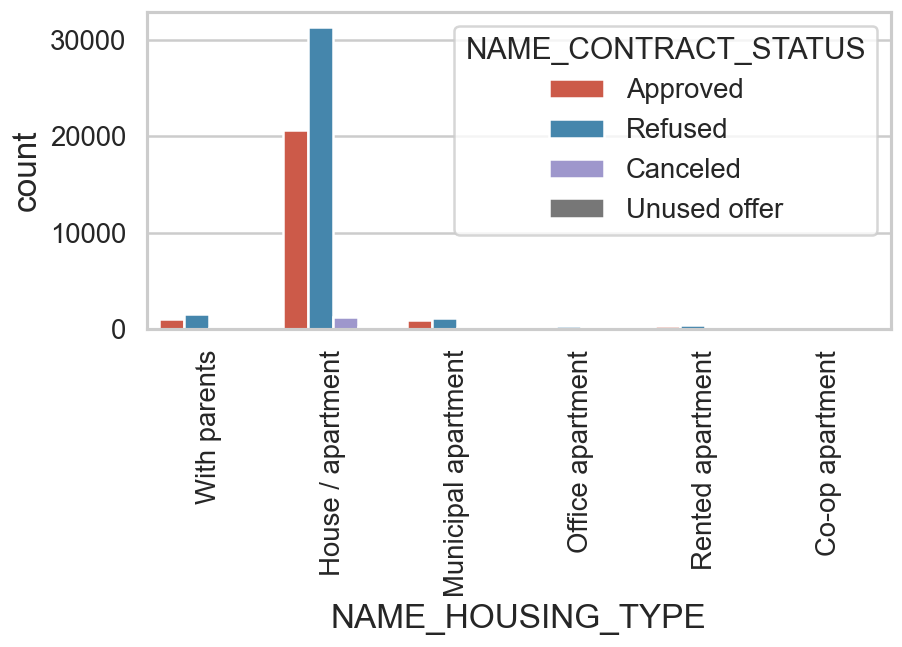

In [102]:
plt.figure(figsize=[8.0,3.5],dpi=120,edgecolor='c',frameon=True)
sns.countplot(data=merged_data,x='NAME_HOUSING_TYPE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.show()

__Inference:__ Highest approved loans are from the housing type 'house/apartment'.

#### Default rate analysis

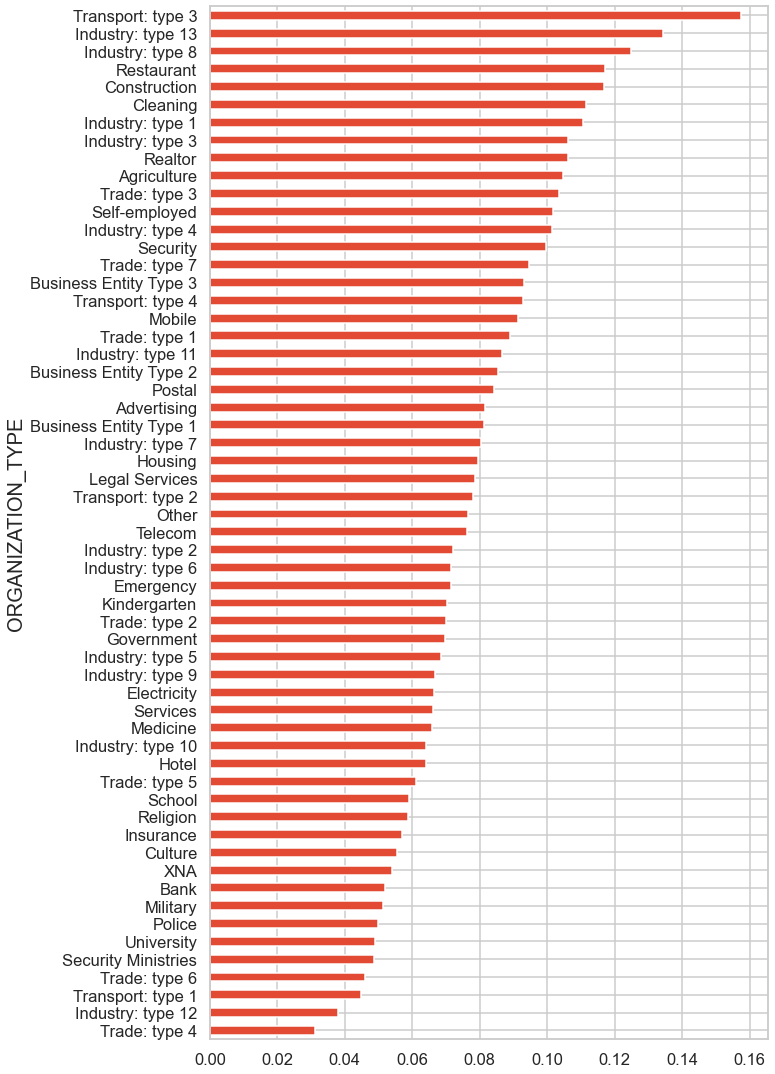

In [103]:
#ORGANIZATION_TYPE
plt.figure(figsize=(10,19))
((app_data.groupby('ORGANIZATION_TYPE')['TARGET'].sum()/app_data.groupby('ORGANIZATION_TYPE')['TARGET'].count()).sort_values()).plot(kind = 'barh', rot = 0)
plt.show()

__Inference:__ The maximum defaults are for organisation type "Transport Type 3"

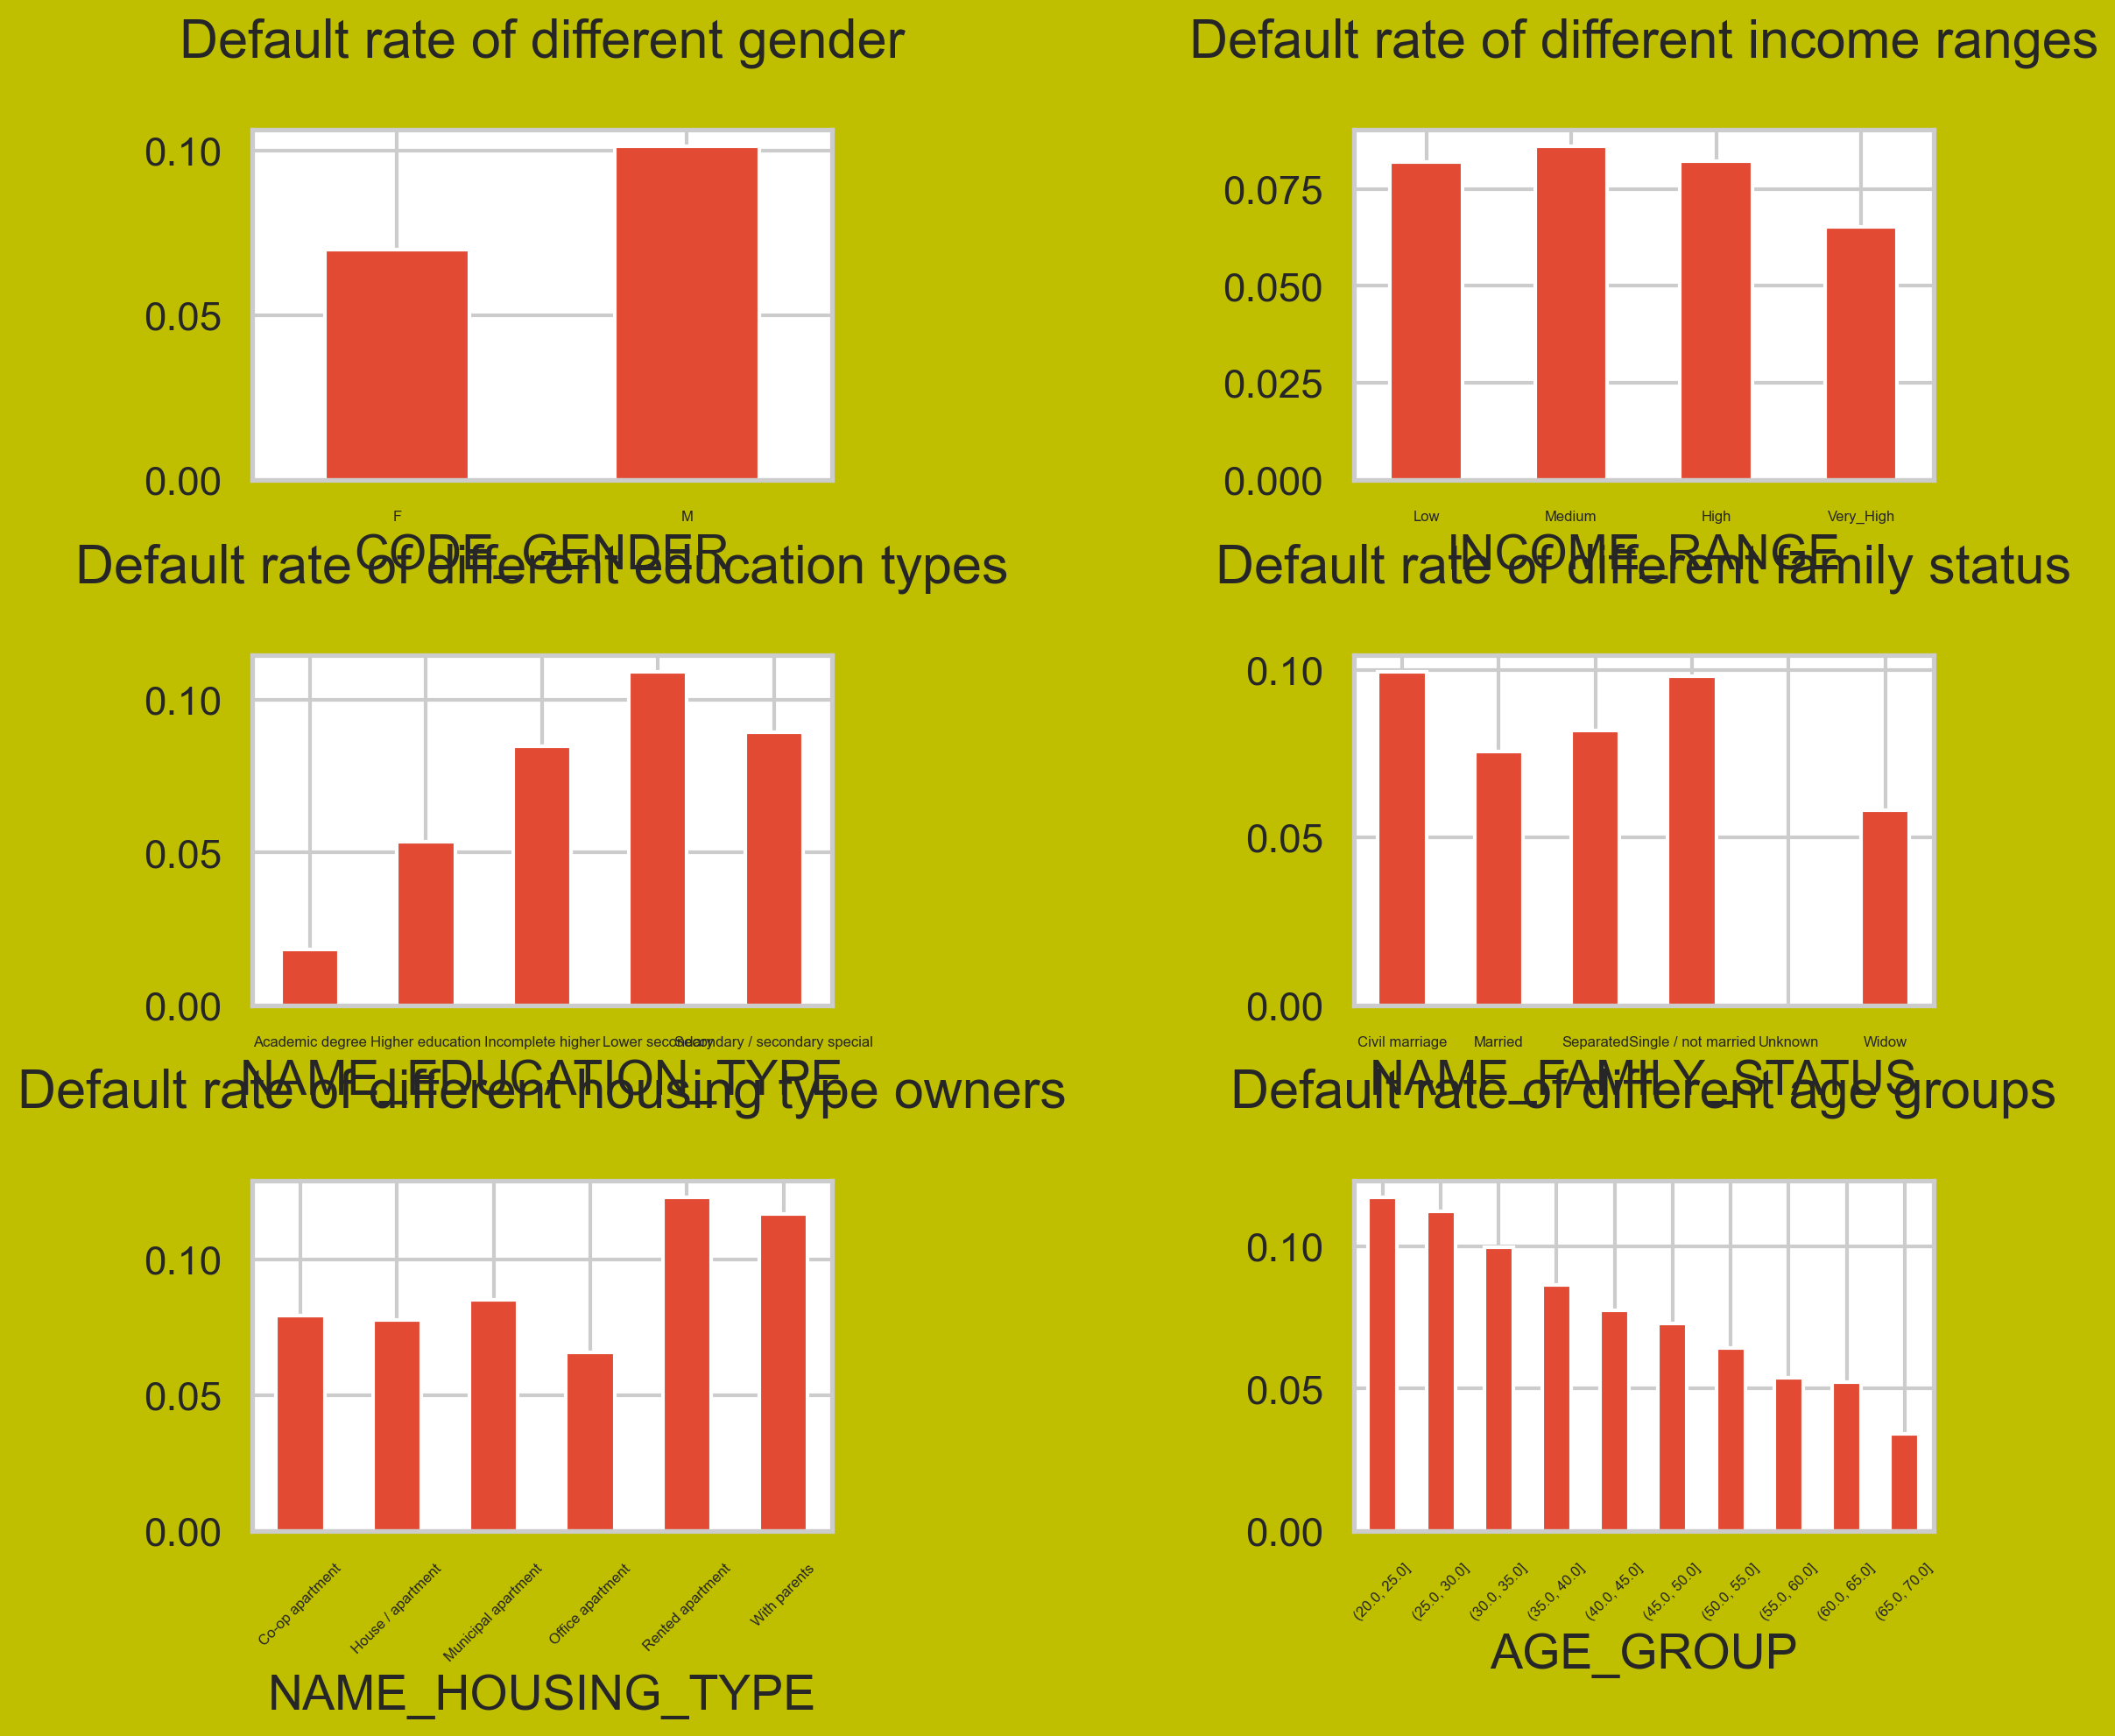

In [104]:
app_data['AGE'] = app_data['DAYS_BIRTH']//365.25
app_data['AGE_GROUP']= pd.cut(app_data.AGE,bins=np.linspace(20 ,70,num=11))

fig = plt.figure(figsize=(12, 10), dpi= 200, facecolor='y', edgecolor='r')
ax1 = fig.add_subplot(321)
(app_data.groupby('CODE_GENDER')['TARGET'].sum()/app_data.groupby('CODE_GENDER')['TARGET'].count()).plot(kind = 'bar', rot = 0, title="Default rate of different gender", ax=ax1)
ax2 = fig.add_subplot(322)
(app_data.groupby('INCOME_RANGE')['TARGET'].sum()/app_data.groupby('INCOME_RANGE')['TARGET'].count()).plot(kind = 'bar', rot = 0, title="Default rate of different income ranges", ax=ax2)
ax3 = fig.add_subplot(323)
(app_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].sum()/app_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].count()).plot(kind = 'bar', title="Default rate of different education types", rot = 0, ax=ax3)
ax4 = fig.add_subplot(324)
(app_data.groupby('NAME_FAMILY_STATUS')['TARGET'].sum()/app_data.groupby('NAME_FAMILY_STATUS')['TARGET'].count()).plot(kind = 'bar', title="Default rate of different family status", rot = 0, ax=ax4)
ax5 = fig.add_subplot(325)
(app_data.groupby('NAME_HOUSING_TYPE')['TARGET'].sum()/app_data.groupby('NAME_HOUSING_TYPE')['TARGET'].count()).plot(kind = 'bar', title="Default rate of different housing type owners", rot = 45,ax=ax5)
ax6 = fig.add_subplot(326)
(app_data.groupby('AGE_GROUP')['TARGET'].sum()/app_data.groupby('AGE_GROUP')['TARGET'].count()).plot(kind = 'bar', title="Default rate of different age groups", rot = 45, ax=ax6)

plt.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.5)

ax1.tick_params(axis='x', labelsize=6)
ax2.tick_params(axis='x', labelsize=6)
ax3.tick_params(axis='x', labelsize=6)
ax4.tick_params(axis='x', labelsize=6)
ax5.tick_params(axis='x', labelsize=6)
ax6.tick_params(axis='x', labelsize=6)
plt.show()

Default rate is a ratio of Number of defaulted / Total Number of Loans in the segment that we are observing. Default rate tells us which category from a particular segment has had the highest to least number of defaults.

# Conclusions

<ol><li>People with 'Low' income range have higher chances of defaulting, therefore we should focus on other income ranges over this.</li>
<li>People with 'Lower secondary' education and 'Single' status have the highest default rate. Therefore, we should be very careful while providing them loans. An authenticated guarantor's presence should be considered mandatory.</li>
<li>Among both genders, even though females are higher applicants than male, it is still observed that females are lesser defaulters than males. Therefore, providing loans to females over males can be a plus point.</li>
<li>People with 'Rented apartments' as their housing type are the highest defaulters. Therefore, we should check the security assets as well as the income of the applicant thoroughly.</li>
<li>Age group (20-25) are the highest defaulters. Whereas, income stability is better in the age groups from 25 to 45 and they are less likely to default. Therefore, we should offer more loans to (25-45) age groups.</li>
<li>People with housing types - 'office apartments' and 'with parents' are least likely to default as compared to other categories. Therefore, we should focus more on providing loans to these applicants.</li>
<li>Banks should focus less on income type ‘Working’ as they have most number of unsuccessful payments.</li>
<li>Banks should focus more on contract type ’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.</li>
<li>With loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.</li></ol>